Una serie de objetos (observadores) quieren monitorear de cerca (ser informados) los cambios que experimenta un determinado objeto (observado) 

Es una relación de tipo 1 a N

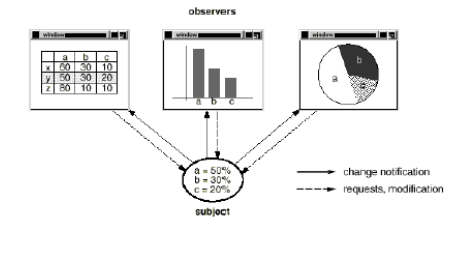

El observador es un tipo de intermediario que llega a los objetos observados e informa esta situación a alguna clase cualquiera

Un ejemplo podría ser el controlador que observa el modelo y cualquier cambio se lo informa a las vistas (modelo-vista-controlador)

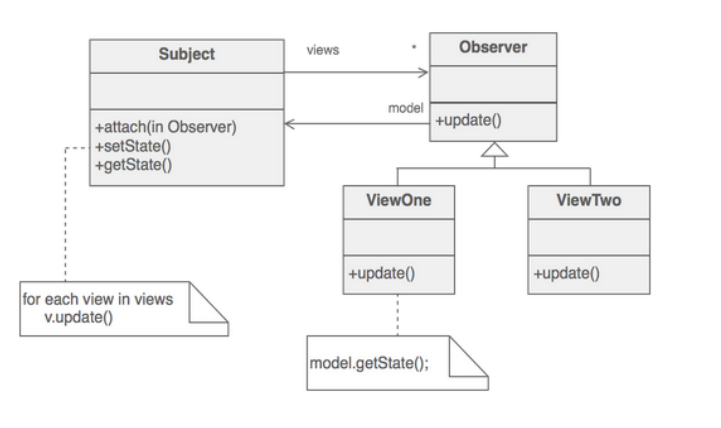

En el primer ejemplo vamos a ver en el caso de tener un solo observador, vemos que se le pasa el objeto Payroll a Employee al instanciarlo. Payroll tiene el método update y este es ejecutado en salary cada vez que se modifica.

"p" esta de cierta forma observando los cambios de sueldo

In [ ]:
class Employee
  	attr_reader :name, :title
  	attr_reader :salary
	def initialize( name, title, salary, payroll) 
		@name = name
        @title = title
        @salary = salary  
		@payroll = payroll
	end 
	def salary=(new_salary) 
		@salary = new_salary 
		@payroll.update(self) 
	end 
end 

class Payroll
  def update( changed_employee )
    puts("Cut a new check for #{changed_employee.name}!")
    puts("His salary is now #{changed_employee.salary}!")
  end
end 


p = Payroll.new
pepe = Employee.new("Jose", "Mr", 550000, p)
puts ("El sueldo de #{pepe.title} #{pepe.name} es de #{pepe.salary}")
luis = Employee.new("Luis", "Dr", 300000, p)
puts ("El sueldo de #{luis.title} #{luis.name} es de #{luis.salary}")

pepe.salary = 600000

luis.salary = 400000

Ahora veremos un ejemplo con más observadores.

Vemos que la clase que debe ser observada, tendrá el método de notificar a los observadores y un atributo de una lista de observadores, los cuales irá agregando y sacando a medida que quiera que estos la observen.

Notemos que el método salary, además de actualizar el sueldo, ejecuta el método ***notify_observers***. En este método se recorre la lista de observadores y a cada uno de ellos se le ejecuta su método update, donde se entrega como parámetro a la clase Employee misma (***Se entrega self***)

In [3]:
class Employee
  attr_reader :name, :title
	attr_reader :salary
 def initialize( name, title, salary ) 
   @name = name 
   @title = title 
   @salary = salary 
   @observers = [] 
 end

 def salary=(new_salary) 
   @salary = new_salary 
   notify_observers 
 end

 def notify_observers 
   @observers.each do |observer| observer.update(self) 
   end 
 end

 def add_observer(observer) 
   @observers << observer 
 end

 def delete_observer(observer) 
   @observers.delete(observer) 
 end 
end


:delete_observer

Ahora creamos los observadores, los cuales tendrán el método update, que recibirá a un objeto de la clase Employee, de manera que, al invocar el método update notificará que este objeto recibido ha cambiado sus parámetros.

In [4]:
class Payroll
  def update( changed_employee )
    puts("Cut a new check for #{changed_employee.name}!")
    puts("His salary is now #{changed_employee.salary}!")
  end
end 

class TaxMan
  def update( changed_employee )
    puts("Send #{changed_employee.name} a new tax bill!")
  end
end 

fred = Employee.new('Fred', 'Crane Operator', 30000.0)

payroll = Payroll.new
fred.add_observer( payroll )

tax_man = TaxMan.new
fred.add_observer(tax_man)


fred.salary=80000

Cut a new check for Fred!
His salary is now 80000!
Send Fred a new tax bill!


80000